In [1]:
import folium
from folium.plugins import MarkerCluster
from folium.plugins import Draw
from folium import plugins
from folium.plugins import MeasureControl
import pandas as pd
import branca
import numpy as np
import vincent
import os
import json
import matplotlib.pyplot as plt
#muestra la version actual de la libreria 
print(folium.__version__)
print(pd.__version__)
print(np.__version__)

0.6.0
0.23.4
1.14.3


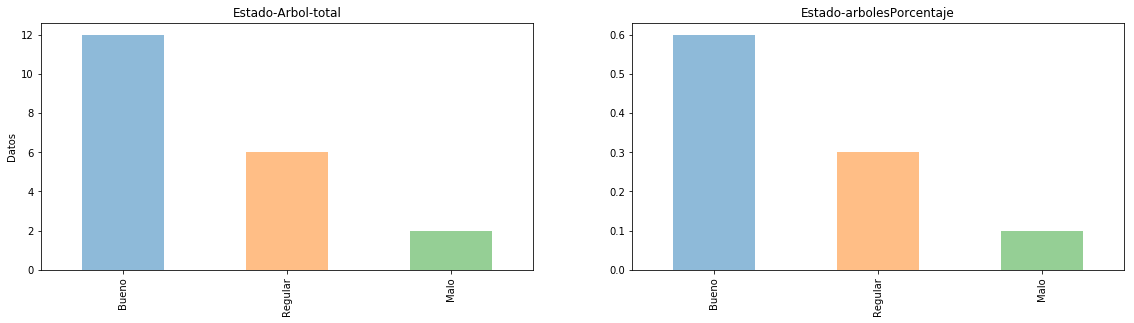

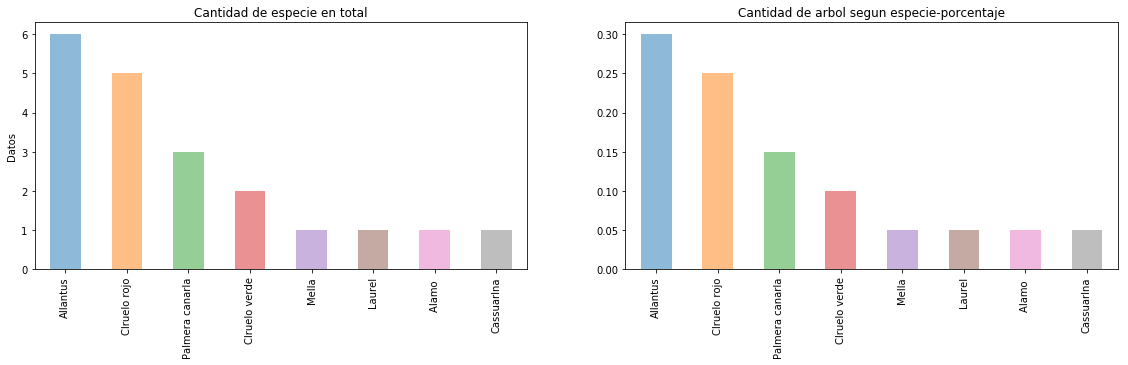

In [2]:
#attr es info relacionada con el mapa que se visualiza abajo 
attr = ('&copy; <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a> '
        'UTEM Cartografia, &copy; <a href="https://github.com/camiloceacarvajal?tab=repositories/attributions">Camilo-Edgar-Bryan-Maria jose-Danilo-Isaac-Diego-Patricio(Github)</a>')
#attr2 es un acceso con el nombre mio que me dirije a facebook
attr2 = ('&copy; <a href="https://earth.google.com/web/">google</a> '
        'UTEM Cartografia, &copy; <a href="https://github.com/camiloceacarvajal?tab=repositories/attributions">Camilo-Edgar-Bryan-Maria jose-Danilo-Isaac-Diego-Patricio(Github)</a>')
#definir de donde se extrae la info 
cementerio_data = pd.read_csv("Tablacementerio.csv")
#definimos el nombre del mapa y sus caracteristicas iniciales tales como:escala,zoom,coordenadas inicial
m = folium.Map(cementerio_data[['Latitudes','Longitudes']].mean().tolist(),
               attr=None,tiles = None, zoom_start=18,control_scale=True,prefer_canvas=True,detect_retina = True)
# abre el archivo geojson con la info y lo muestra en nuestor mapa
with open(os.path.join('data', 'export.geojson')) as f:
    bars = json.loads(f.read())
plugins.Search(bars, search_zoom=18).add_to(m)
#mapa base de thunderforest
folium.raster_layers.TileLayer(
    tiles='https://tile.thunderforest.com/transport/{z}/{x}/{y}.png?apikey=3cd85f11f4744c0c8c3bdaab8483cde0',
    attr= attr,name='Mapa Base OSM',
    max_zoom=21,subdomains=['mt0', 'mt1', 'mt2', 'mt3'],
    overlay=False,control=True,
).add_to(m)
#tesela base de de google
folium.raster_layers.TileLayer(
    tiles='http://{s}.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
    attr= attr2,name='Google Earth',
    max_zoom=21,subdomains=['mt0', 'mt1', 'mt2', 'mt3'],
    overlay=False,control=True,
).add_to(m)
#marcador que dirige al mapa de recoleta creado por la empresa esri chile
ref_html = r'<a href="http://munirecoleta.maps.arcgis.com/apps/webappviewer/index.html?id=7361880dbdcd44d1b02ab91c1d07d5eb" target="_blank"> Mapa Recoleta </a>'
pop_html = folium.Popup(folium.Html(ref_html, script=True))
folium.Marker([-33.4177, -70.6504],popup = pop_html,icon=folium.Icon(color='red',icon='tree-deciduous')).add_to(m)
#marcador que dirige al mapa de mapillary del cementerio
ref_html = r'<a href="https://www.mapillary.com/app/?lat=-33.41700338888893&lng=-70.65034652777774&z=17&pKey=aTS8sJ-LHWhn5A6Ti5u8rw" target="_blank">Mapa Foto </a>'
pop_html = folium.Popup(folium.Html(ref_html, script=True))
folium.Marker([-33.4178, -70.6497],popup = pop_html,icon=folium.Icon(color='red',icon='tree-deciduous')).add_to(m)
# Agrega herramienta a la esquina superior derecha
m.add_child(MeasureControl())
#plugins.ScrollZoomToggler().add_to(m)
plugins.Fullscreen(
    position='topright',title='Expandir',
    title_cancel='salir',force_separate_button=True).add_to(m)
# definicion y leer de tablas de atributos 
cementerio_data = pd.read_csv("Tablacementerio.csv")
mc = MarkerCluster(name="Patios")
#ciclo desde para generar marcadores con una visual como excel 
for N,data in cementerio_data.iterrows():
    station_html = folium.Html('<b>%s</b>' %(pd.DataFrame(data).to_html()),script=True)
    mc.add_child(folium.Marker([data.Latitudes,data.Longitudes],
 popup = folium.Popup(station_html),icon=folium.Icon(color='green'if data.Status == 'Bueno'
                  else 'red',prefix = 'glyphicon',icon='tree-deciduous')                              
                    ))
#controlador de capas 
m.add_child(mc)
m.add_child(folium.LayerControl())
#marca lat lot del punto o lugar
m.add_child(folium.LatLngPopup())
Draw(export=None).add_to(m)
#guardar archivo con un nombre 
m.save(os.path.join('results', 'Mapacementerio0.99.html'))
#Definir figura
fig = plt.figure(figsize=(30,10))
plt.subplot2grid((2,3),(0,2))
#indicar datos y tablas
cementerio_data .Status.value_counts(normalize= True).plot(kind="bar",alpha=0.5)
#titulo de las tablas
plt.title("Estado-arbolesPorcentaje")
plt.subplot2grid((2,3),(0,1))
cementerio_data .Status.value_counts().plot(kind='bar',alpha=0.5)
plt.title("Estado-Arbol-total")
plt.ylabel('Datos')
plt.savefig("Ejemplo2.jpg")
#visualizacion de graficos
fig = plt.figure(figsize=(30,10))
plt.subplot2grid((2,3),(0,2))
cementerio_data .Nombre.value_counts(normalize= True).plot(kind="bar",alpha=0.5)
plt.title("Cantidad de arbol segun especie-porcentaje")
plt.subplot2grid((2,3),(0,1))
cementerio_data .Nombre.value_counts().plot(kind='bar',alpha=0.5)
plt.title("Cantidad de especie en total")
plt.ylabel('Datos')
m

In [7]:
#VISUALIZAR PRODUCTOS ONLINE
from IPython.display import IFrame
IFrame('http://apps.cartodata.com/modelados/gdl-arboles', width=1000, height=500)

In [ ]:
#VISUALIZAR YOUTUBE PARA VER TUTORIALES
from IPython.lib.display import YouTubeVideo
YouTubeVideo('U4GXNzom6ik')

In [ ]:
#PAGINA WEB 
from IPython.display import IFrame
IFrame('http://www.meteochile.gob.cl/PortalDMC-web/index.xhtml', width=900, height=450)

In [10]:
print(cementerio_data .count())

N              20
Altura         20
Latitudes      20
Longitudes     20
Radio          20
Codigo         20
Status         20
Dap            20
Nombre         20
Calle          20
TratamIento    20
N° REBROTES    20
Fisico          3
dtype: int64


In [3]:
df = pd.read_csv('Tablacementerio.csv')
df.head()

,N,Altura,Latitudes,Longitudes,Radio,Codigo,Status,Dap,Nombre,Calle,TratamIento,N° REBROTES,Fisico
0,1,4,-33.416658,-70.647883,2,005AP01,Regular,15,CIruelo rojo,Adm. PonIente,MANTENCION,1,Daño físIco
1,2,3,-33.416737,-70.647618,1,005AP02,Regular,19,CIruelo rojo,Adm. PonIente,MANTENCION,2,NaN
2,3,3,-33.416841,-70.648014,"1,5",005AP03,Regular,13,CIruelo rojo,Adm. PonIente,MANTENCION,3,NaN
3,4,"2,5",-33.416689,-70.647858,"0,5",005AP04,Regular,11,CIruelo rojo,Adm. PonIente,MANTENCION,4,Daño físIco
4,5,"2,2",-33.417031,-70.647738,"1,5",005AP05,Regular,11,CIruelo rojo,Adm. PonIente,MANTENCION,5,Daño físIco


In [13]:
col_names = cementerio_data.columns.tolist()
for column in col_names:
    print("valores nulos en  <{0}>: {1}".format(column,cementerio_data [column].isnull().sum()))

valores nulos en  <N>: 0
valores nulos en  <Altura>: 0
valores nulos en  <Latitudes>: 0
valores nulos en  <Longitudes>: 0
valores nulos en  <Radio>: 0
valores nulos en  <Codigo>: 0
valores nulos en  <Status>: 0
valores nulos en  <Dap>: 0
valores nulos en  <Nombre>: 0
valores nulos en  <Calle>: 0
valores nulos en  <TratamIento>: 0
valores nulos en  <N° REBROTES>: 0
valores nulos en  <Fisico>: 17
